# Clustering Homework
- Execute the below code and complete the following questions. DO NOT commit the csv file

In [53]:
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np

def generate_data():
    
    X, y = make_classification(n_samples=4000, 
                          n_features=50, 
                          n_redundant=30, 
                          n_repeated=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          class_sep = 0.9,
                          random_state = 1200,
                          scale=1
                         )

    colNames = ['var'+str(x) for x in range(50)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1), columns=colNames)
    
    df['var0'] = np.where(df['var0'] < 0, 'a', np.where(df['var0'] < 0.5, 'b', 'c'))
    df['var1'] = np.where(df['var1'] < -.5, 'd', np.where(df['var1'] < 0.4, 'e', 'f'))
    df['var2'] = np.where(df['var2'] < 0, 'g', np.where(df['var2'] < 0.5, 'h', 'i'))

    df.to_csv('clustering-data.csv', index=False)

generate_data()

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clustering-data.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,a,d,g,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,a,d,i,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,a,d,g,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,b,e,i,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,a,d,h,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   object 
 1   var1    4000 non-null   object 
 2   var2    4000 non-null   object 
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

In [50]:
df['var2'].head()

0    g
1    i
2    g
3    i
4    h
Name: var2, dtype: object

# Data Definitions
- var0 - var49: some feature that could be used to describe the target.
- target: variable that contains the classes. This is your target variable.

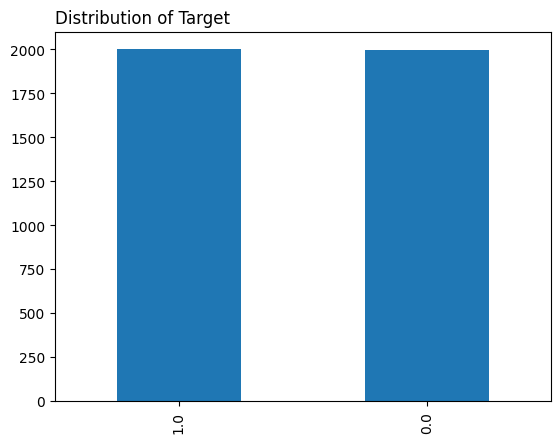

In [55]:
df.target.value_counts().plot.bar()
plt.title('Distribution of Target', loc='left')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 3200
Test examples: 800

Feature names:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19	var20	var21	var22	var23	var24	var25	var26	var27	var28	var29	var30	var31	var32	var33	var34	var35	var36	var37	var38	var39	var40	var41	var42	var43	var44	var45	var46	var47	var48	var49


# Question 1
- Using X_train, you will perform k-means clustering using best practices.
- Determine what the "optimum" number of clusters is - support your answer.
- Visualize the results of your clustering using PCA.
- Based on the visualization, how do you interpret the clustering result?

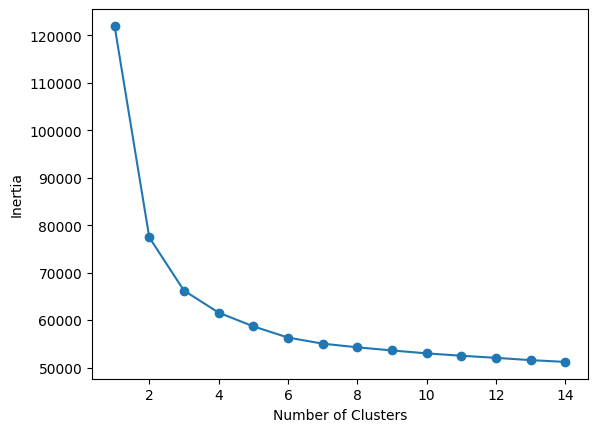

In [91]:
from sklearn.cluster import KMeans
distortions = list()
X_train = pd.get_dummies(X_train)
for i in range(1, 15):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X_train)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#### optimal number of clusters is 3 from the above plot

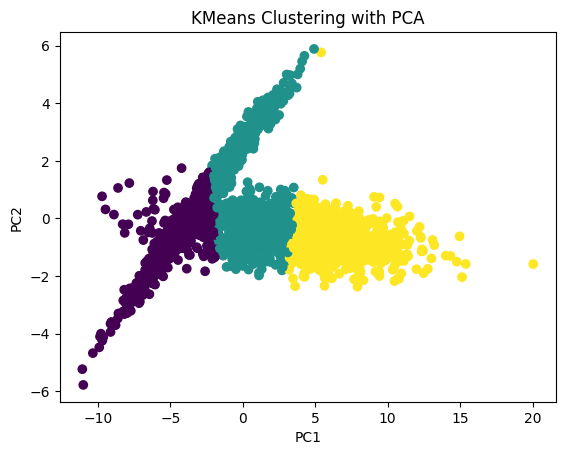

In [92]:
# Fitting  KMeans with optimal number of clusters(3) found from above plot 
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_train)

# Visualize clustering with PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering with PCA')
plt.show()

 Based on the above visualizations, when i choose 3 clusters , clusers are clearly seperated in the visualization which clearlu indicates that it clearly seperated the data into distinct groups. Interpretation can be influenced by the specific domain knowledge

# Question 2
- Using X_train and y_train, create a logistic regression model. Then evaluate the performance on the test data. The only preprocessing steps you should include are scaling and one hot encoding.
- Using cross-validation and grid search on the regularization strength using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.
- What is your opinion of the model's performance?

In [93]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc

categoric_pipeline = Pipeline(steps = [('onehotencoder',  OneHotEncoder(handle_unknown = 'ignore',drop = 'first'))])
numeric_pipeline = Pipeline(steps = [('scaler',  StandardScaler())])

preprocessor = ColumnTransformer(transformers = [('num', numeric_pipeline,num_cols),('cat',categoric_pipeline, cat_cols)])

pipeline = Pipeline(steps = [('preprocessor', preprocessor), ('regressor', LogisticRegression())])


pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

score = pipeline.score(X_test,y_test)
print(score)


0.93375


In [94]:
# Using grid search and cross validation 
parameters = {
    'regressor__penalty' : ['l2'], 
    'regressor__C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'regressor__solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
from sklearn.model_selection import GridSearchCV
gcv_results = GridSearchCV(estimator= pipeline, param_grid=parameters, scoring='accuracy', cv=10)
gcv_results = gcv_results.fit(X_train, y_train)
Y_pred_gcv = gcv_results.predict(X_test)
score = gcv_results.score(X_test,y_test)
print(score)


0.93375


Accuracy: 0.93
Precision: 0.99
Recall: 0.88


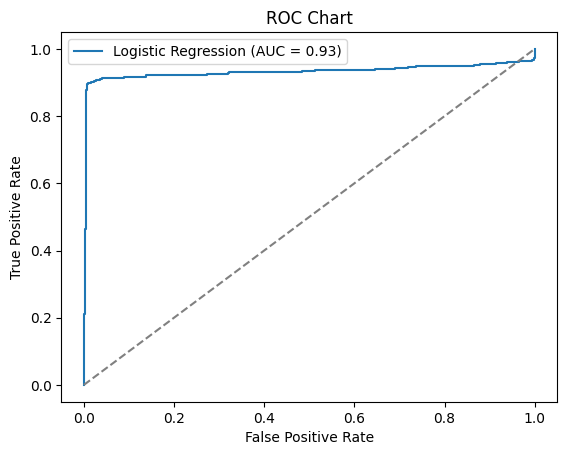

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       394
         1.0       0.99      0.88      0.93       406

    accuracy                           0.93       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800



In [95]:

### Metrics calculation
accuracy = accuracy_score(y_test, Y_pred_gcv)
precision = precision_score(y_test, Y_pred_gcv)
recall = recall_score(y_test, Y_pred_gcv)
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))


y_prob = gcv_results.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC chart
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Chart')
plt.legend()
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred_gcv))

Logistic regression model performed well with decent accuracy (0.93). Precision(0.99) and recall(0.88) are also good. we can try more hypertuning to see if performance improves more to get more accuracate model. Overall, Logistic regression gave considerable model with decent performance

# Question 3
- Using X_train and y_train, create a logistic regression model, that includes a pipeline step that uses PCA.
- Perform a grid search on various number of components and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.
- What is your opinion of the model's performance?

best number of pca components is 5
Accuracy: 0.93
Precision: 0.99
Recall: 0.87


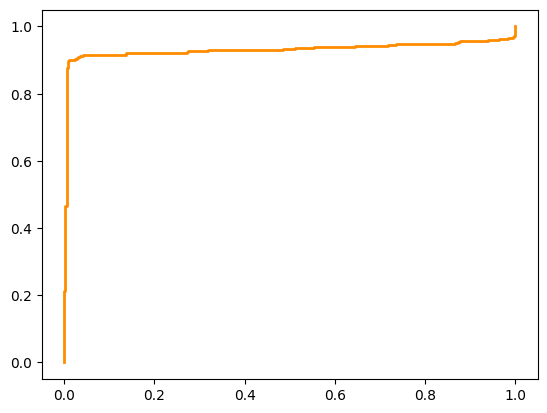

In [98]:
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score
p = Pipeline([('preprocessor', preprocessor), 
              ('pca', PCA()),
              ('model', LogisticRegression(random_state=40))
             ])
param_grid = {
    'pca__n_components': [5, 10, 15, 20],
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100]
}
grid_search = GridSearchCV(estimator = p, param_grid = param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_pca_components = grid_search.best_params_['pca__n_components']
best_C = grid_search.best_params_['model__C']

print("best number of pca components is", best_pca_components)
best_model = grid_search.best_estimator_

# Predict on the test data
y_pred = best_model.predict(X_test)

#  Metrics calculation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))

# Compute the ROC curve and AUC score
y_score = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

Using Pca with logistic regression also helped us achieve similar results compared to baseline logistic regression model(without pca).Pca doesnt have much impact in improving the accuracy and it didnot decrease the  performance though.

# Question 4
- Using X_train and y_train, create a logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step.
-  Use grid search and evaluate multiple cluster numbers and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.
- What is your opinion of the model's performance?

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

p = Pipeline([('preprocessor', preprocessor),('sc', StandardScaler()),
             ('kmeans', KMeans(n_clusters=100)),
              ('logreg', LogisticRegression(solver='liblinear'))])

p.fit(X_train, y_train)
p_score = p.score(X_test, y_test)
print(f'Using k-means preprocesser: {p_score:.2%}')

Using k-means preprocesser: 93.88%


Best hyperparameters: {'kmeans__n_clusters': 5, 'logreg__C': 100}
Best score: 0.9553125
Accuracy: 0.9475
Precision: 0.9945652173913043
Recall: 0.9014778325123153
AUC: 0.948


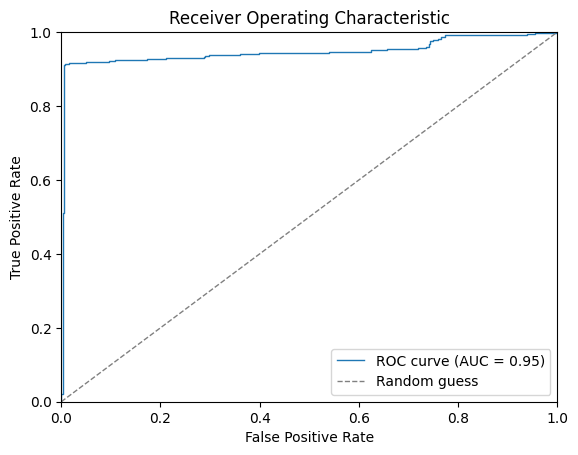

In [100]:
param_grid = {
    'kmeans__n_clusters': [2, 3, 4, 5],
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(p, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding mean score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Evaluate performance on test set
y_pred = grid_search.predict(X_test)
y_prob = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f'AUC: {auc:.3f}')

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, lw=1, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], '--', color='gray', lw=1, label='Random guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

 Using kmeans clustering as preprocessor for logistic regression helped me to achieve far more good results with improved accuracy(0.94) and improved recall too(which is 0.90).To give the background, By clustering similar data points together, k-means can identify patterns and relationships in the data that may not be apparent in the original feature space. It is achieved by using k-means clustering to cluster similar data points together and then using the cluster assignments as new features in a logistic regression model, which resulted in improved accuracy

# Question 5
- Which model, based on the results of Questions 2-4 would you recommend to use?
- Use as much code as necessary to support your choice.
- Insert response

In [ ]:
Logistic regression with kmeans as preprocessor (Question 4) achieved good performance and I recommend the same

Out of all the models built for Question 2-4 I would recommend using the logistic regression model that includes a pipeline step and kmeans as preprocessor which is done for Question 4. This model provided the highest accuracy(0.94), precision(0.99), and recall scores(0.90), as well as the highest AUC value among the three models tested.
Using k-means as a preprocessor for logistic regression can help to reduce overfitting by reducing the dimensionality of the feature space and capturing the most important information in the data. This can lead to better generalization performance and improved predictive accuracy on new data.Overall, using k-means clustering as a preprocessor for logistic regression can be a powerful approach for dealing with high-dimensional data and improving the performance of logistic regression models.